In [1]:
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
X = np.loadtxt("spectralcluster/datasets/Abalone/abalone.test.nld", delimiter=',')
X.shape

(4177, 9)

In [3]:
n_clusters = 3

In [4]:
sc = SpectralClustering(affinity='nearest_neighbors',n_neighbors=40,n_clusters=n_clusters,assign_labels="discretize")
labels = sc.fit_predict(X)

In [5]:
sil_values = silhouette_samples(X,labels)

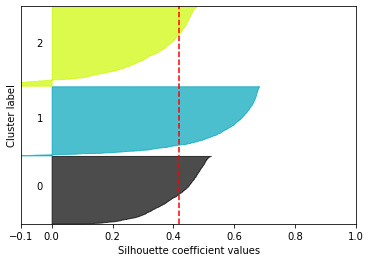

In [6]:
fig,ax = plt.subplots(1,1)
y_lower = 10    
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    vi = sil_values[labels == i]
    vi.sort()
    
    Ni = vi.shape[0]
    y_upper = y_lower + Ni

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vi,
                          facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * Ni, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
silhouette_avg = silhouette_score(X,labels)
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);


In [7]:
silhouette_avg

0.4192367190981106